In [1]:
import os
import sys

# 改变工作目录到上一级 (项目根目录)
if os.path.basename(os.getcwd()) == 'Test':
    os.chdir('..')
    print(f"工作目录已改为: {os.getcwd()}")

# 添加路径到sys.path
uav_path = os.path.join(os.getcwd(), 'Single UAV path planning', 'path planning')
if uav_path not in sys.path:
    sys.path.append(uav_path)
    print(f"已添加路径: {uav_path}")

# 验证路径
if os.path.exists(uav_path):
    print("✓ 路径验证成功")
else:
    print("✗ 路径验证失败")

工作目录已改为: /Users/zhy/Documents/GitHub/UAV-path-planning
已添加路径: /Users/zhy/Documents/GitHub/UAV-path-planning/Single UAV path planning/path planning
✓ 路径验证成功


In [ ]:
# -*- coding: utf-8 -*-
#开发者：Bright Fang
#开发时间：2023/7/30 18:13
from rl_env.path_env import RlGame
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle as pkl
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
shoplistfile_test = 'Multi-UAVs path planning/path planning/sample_indextest'  #保存文件数据所在文件的文件名'
N_Agent=1
M_Enemy=5
L_Obstacle=3
RENDER=True
# RENDER=False
env = RlGame(n=N_Agent,m=M_Enemy,l=L_Obstacle,render=RENDER).unwrapped
EPIOSDE_ALL=500
TEST_EPIOSDE=100
TRAIN_NUM = 5
EP_LEN = 1000
state_number=7
action_number=env.action_space.shape[0]
max_action = env.action_space.high[0]
min_action = env.action_space.low[0]
LR_A = 5e-4    # learning rate for actor
LR_C = 1e-3    # learning rate for critic
GAMMA = 0.9
MemoryCapacity=20000
Batch=128
Switch=1
tau = 0.0005

def main():
    run(env)
def run(env):
    print('随机测试中...')
    win_times = 0
    average_timestep=0
    average_integral_V=0
    average_integral_U= 0
    all_ep_V, all_ep_U, all_ep_T = [], [], []
    for j in range(TEST_EPIOSDE):
        state = env.reset()
        total_rewards = 0
        integral_V=0
        integral_U=0
        for timestep in range(EP_LEN):
            for i in range(N_Agent+M_Enemy):
                action = env.action_space.sample()
            new_state, reward,done,edge_r,obstacle_r,goal_r,win= env.step(action)  # 执行动作
            if win:
                win_times += 1
            integral_V += state[2]
            integral_U += abs(action).sum()
            total_rewards += reward
            state = new_state
            if RENDER:
                env.render()
            if done:
                break
        average_timestep += timestep
        average_integral_V += integral_V
        average_integral_U += integral_U
        print("Score", total_rewards)
        all_ep_V.append(integral_V)
        all_ep_U.append(integral_U)
        all_ep_T.append(timestep)
    print('任务完成率', win_times / TEST_EPIOSDE)
    print('平均最短飞行时间', average_timestep / TEST_EPIOSDE)
    print('平均最短飞行路程', average_integral_V / TEST_EPIOSDE)
    print('平均最小能量损耗', average_integral_U / TEST_EPIOSDE)
    # env.close()
    # d = {"all_ep_V": all_ep_V, "all_ep_U": all_ep_U, "all_ep_T": all_ep_T}
    # f = open(shoplistfile_test, 'wb')  # 二进制打开，如果找不到该文件，则创建一个
    # pkl.dump(d, f, pkl.HIGHEST_PROTOCOL)  # 写入文件
    # f.close()

    # win_times = 0
    # average_timestep=0
    # average_integral_V=0
    # average_integral_U= 0
    # all_ep_r = [[] for i in range(TRAIN_NUM)]
    # for k in range(TRAIN_NUM):
    #     for j in range(TEST_EPIOSDE):
    #         state = env.reset()
    #         total_rewards = 0
    #         integral_V=0
    #         integral_U=0
    #         for timestep in range(EP_LEN):
    #             for i in range(N_Agent+M_Enemy):
    #                 action = env.action_space.sample()
    #             new_state, reward,done,edge_r,obstacle_r,goal_r,win= env.step(action)  # 执行动作
    #             if win:
    #                 win_times += 1
    #             integral_V += state[2]
    #             integral_U += abs(action).sum()
    #             total_rewards += reward
    #             state = new_state
    #             if RENDER:
    #                 env.render()
    #             if done:
    #                 break
    #         average_timestep += timestep
    #         average_integral_V += integral_V
    #         average_integral_U += integral_U
    #         print("Score", total_rewards)
    #         all_ep_r[k].append(total_rewards)
    #     print('任务完成率', win_times / TEST_EPIOSDE)
    #     print('平均最短飞行时间', average_timestep / TEST_EPIOSDE)
    #     print('平均最短飞行路程', average_integral_V / TEST_EPIOSDE)
    #     print('平均最小能量损耗', average_integral_U / TEST_EPIOSDE)
    #     # env.close()
    # all_ep_r_mean = np.mean((np.array(all_ep_r)), axis=0)
    # all_ep_r_std = np.std((np.array(all_ep_r)), axis=0)
    # d = {"all_ep_r_mean": all_ep_r_mean, "all_ep_r_std": all_ep_r_std}
    # f = open(shoplistfile_test, 'wb')  # 二进制打开，如果找不到该文件，则创建一个
    # pkl.dump(d, f, pkl.HIGHEST_PROTOCOL)  # 写入文件
    # f.close()
    # all_ep_r_max = all_ep_r_mean + all_ep_r_std * 0.95
    # all_ep_r_min = all_ep_r_mean - all_ep_r_std * 0.95
    # plt.plot(np.arange(len(all_ep_r_mean)), all_ep_r_mean, label='随机策略', color='#e75840')
    # plt.fill_between(np.arange(len(all_ep_r_mean)), all_ep_r_max, all_ep_r_min, alpha=0.6, facecolor='#e75840')
    # plt.xlabel('Monte Carlo测试回合数')
    # plt.ylabel('总奖励')
    # plt.legend()
    # plt.show()
if __name__ == '__main__':
    main()

随机测试中...


NameError: name 'quit' is not defined

: 

开始Go-Explore专家数据生成...
阶段1: 初始随机探索
初始探索进度: 0/100, 发现网格数: 3
初始探索进度: 20/100, 发现网格数: 11
gg
初始探索进度: 40/100, 发现网格数: 11
gg
初始探索进度: 60/100, 发现网格数: 12
gg
初始探索进度: 80/100, 发现网格数: 12
gg
gg
阶段2: 基于存档的系统探索
探索进度: 100/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: -0.22
专家轨迹数: 0
--------------------------------------------------
探索进度: 200/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: -0.22
专家轨迹数: 0
--------------------------------------------------
gg
gg
gg
gg
gg
探索进度: 300/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: -0.21
专家轨迹数: 0
--------------------------------------------------
gg
gg
gg
探索进度: 400/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: -0.21
专家轨迹数: 0
--------------------------------------------------
gg
gg
gg
gg
gg
探索进度: 500/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: -0.21
专家轨迹数: 0
--------------------------------------------------
gg
gg
探索进度: 600/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: 0.00
专家轨迹数: 0
--------------------------------------------------
gg
gg
gg
gg
gg
gg
探索进度: 700/2000
发现网格数: 12
成功轨迹数: 0
最佳奖励: 0.00
专家轨迹数: 0
--------------------------------------------------
gg
gg

/opt/miniconda3/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/miniconda3/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/59/76h52s611154cw1jnz1dgz5r0000gn/T/ipykernel_55267/2432414582.py:326: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/59/76h52s611154cw1jnz1dgz5r0000gn/T/ipykernel_55267/2432414582.py:326: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/59/76h52s611154cw1jnz1dgz5r0000gn/T/ipykernel_55267/2432414582.py:326: UserWarning: Glyph 25506 (\N{CJK UNIFIED IDEOGRAPH-63A2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/59/76h52s611154cw1jnz1dgz5r0000gn/T/ipykernel_55267/24324145

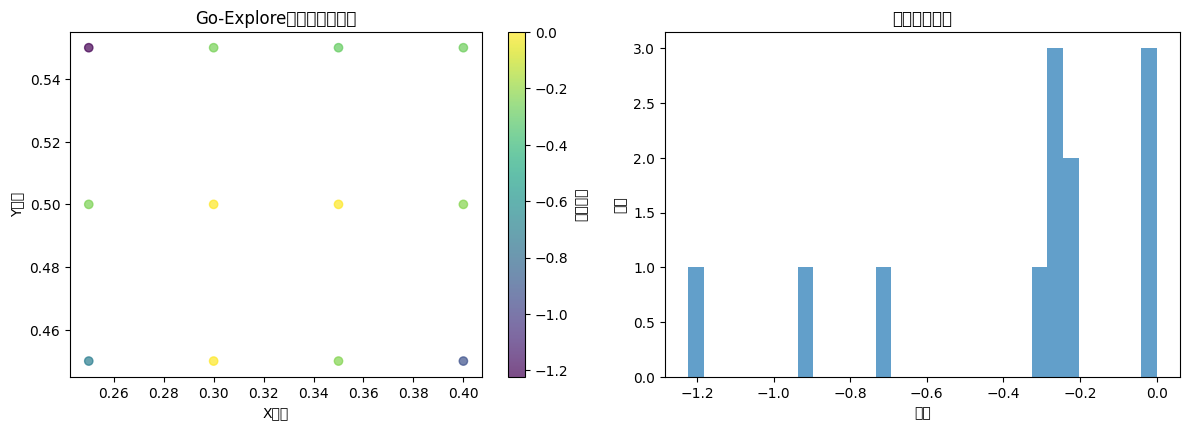

In [11]:
import sys
sys.path.append('Single UAV path planning/path planning')

import numpy as np
import pickle as pkl
import copy
from collections import defaultdict, deque
import random
from rl_env.path_env import RlGame
import matplotlib.pyplot as plt

class GoExploreExpert:
    def __init__(self, env, cell_size=50, max_episodes=1000, archive_size=10000):
        """
        Go-Explore专家数据生成器
        
        Args:
            env: 环境实例
            cell_size: 状态空间离散化的网格大小
            max_episodes: 最大探索轮数
            archive_size: 存档最大容量
        """
        self.env = env
        self.cell_size = cell_size
        self.max_episodes = max_episodes
        self.archive_size = archive_size
        
        # 状态存档：key=cell, value=最佳轨迹信息
        self.archive = {}
        # 专家轨迹数据
        self.expert_trajectories = []
        # 探索统计
        self.exploration_stats = {
            'cells_discovered': 0,
            'successful_episodes': 0,
            'best_reward': -float('inf')
        }
        
    def discretize_state(self, state):
        """将连续状态离散化为网格单元"""
        x = int(state[0] * 1000 // self.cell_size)  # 位置x
        y = int(state[1] * 1000 // self.cell_size)  # 位置y
        # 可以添加更多维度的离散化
        return (x, y)
    
    def calculate_cell_score(self, cell_info):
        """计算网格单元的探索价值分数"""
        # 基础分数基于奖励
        score = cell_info['best_reward']
        
        # 添加探索奖励（访问次数越少分数越高）
        exploration_bonus = 100.0 / (cell_info['visit_count'] + 1)
        
        # 距离目标的奖励
        distance_to_goal = np.sqrt((cell_info['state'][0] - cell_info['state'][4])**2 + 
                                 (cell_info['state'][1] - cell_info['state'][5])**2)
        distance_reward = -distance_to_goal * 10
        
        return score + exploration_bonus + distance_reward
    
    def select_cell_to_explore(self):
        """选择要探索的网格单元"""
        if not self.archive:
            return None
            
        # 计算所有网格的探索分数
        cell_scores = []
        for cell, info in self.archive.items():
            score = self.calculate_cell_score(info)
            cell_scores.append((score, cell, info))
        
        # 使用softmax选择，倾向于选择高分数的网格
        scores = np.array([score for score, _, _ in cell_scores])
        if len(scores) > 0:
            # 添加温度参数控制探索vs利用
            temperature = 2.0
            exp_scores = np.exp(scores / temperature)
            probabilities = exp_scores / np.sum(exp_scores)
            
            selected_idx = np.random.choice(len(cell_scores), p=probabilities)
            return cell_scores[selected_idx]
        
        return None
    
    def restore_to_cell(self, cell_info):
        """将环境恢复到指定网格单元的状态"""
        # 这里需要根据你的环境实现状态恢复
        # 由于path_env没有直接的状态设置方法，我们使用轨迹重放
        trajectory = cell_info['trajectory']
        
        state = self.env.reset()
        for action in trajectory:
            state, _, done, _, _, _, _ = self.env.step(action)
            if done:
                break
        
        return state
    
    def explore_from_cell(self, start_state, max_steps=200):
        """从指定状态开始探索"""
        trajectory = []
        states = []
        rewards = []
        
        state = start_state
        total_reward = 0
        
        for step in range(max_steps):
            # 使用改进的动作选择策略
            action = self.select_action(state, step, max_steps)
            
            next_state, reward, done, edge_r, obstacle_r, goal_r, win = self.env.step(action)
            
            trajectory.append(action.copy())
            states.append(state.copy())
            rewards.append(reward)
            total_reward += reward
            
            # 更新存档
            cell = self.discretize_state(next_state)
            self.update_archive(cell, next_state, trajectory.copy(), total_reward)
            
            state = next_state
            
            if done:
                if win:
                    self.exploration_stats['successful_episodes'] += 1
                    # 成功轨迹加入专家数据
                    self.expert_trajectories.append({
                        'states': states,
                        'actions': trajectory,
                        'rewards': rewards,
                        'total_reward': total_reward,
                        'success': True
                    })
                break
        
        return total_reward, len(trajectory), win
    
    def select_action(self, state, step, max_steps):
        """改进的动作选择策略"""
        # 目标导向的启发式动作
        goal_x, goal_y = state[4], state[5]
        current_x, current_y = state[0], state[1]
        
        # 计算朝向目标的方向
        dx = goal_x - current_x
        dy = goal_y - current_y
        distance = np.sqrt(dx**2 + dy**2)
        
        if distance > 0.01:  # 避免除零
            # 归一化方向向量
            target_action = np.array([dx/distance, dy/distance])
            
            # 添加噪声进行探索
            noise_scale = 0.3 * (1.0 - step/max_steps)  # 随时间减少噪声
            noise = np.random.normal(0, noise_scale, 2)
            action = target_action + noise
            
            # 限制动作范围
            action = np.clip(action, -1, 1)
        else:
            # 随机探索
            action = np.random.uniform(-1, 1, 2)
        
        return action
    
    def update_archive(self, cell, state, trajectory, reward):
        """更新存档"""
        if cell not in self.archive:
            self.archive[cell] = {
                'state': state.copy(),
                'trajectory': trajectory.copy(),
                'best_reward': reward,
                'visit_count': 1,
                'first_visit_step': len(trajectory)
            }
            self.exploration_stats['cells_discovered'] += 1
        else:
            self.archive[cell]['visit_count'] += 1
            if reward > self.archive[cell]['best_reward']:
                self.archive[cell]['state'] = state.copy()
                self.archive[cell]['trajectory'] = trajectory.copy()
                self.archive[cell]['best_reward'] = reward
        
        # 更新全局最佳奖励
        if reward > self.exploration_stats['best_reward']:
            self.exploration_stats['best_reward'] = reward
        
        # 限制存档大小
        if len(self.archive) > self.archive_size:
            self.prune_archive()
    
    def prune_archive(self):
        """修剪存档，保留最有价值的网格"""
        # 计算所有网格的分数
        scored_cells = []
        for cell, info in self.archive.items():
            score = self.calculate_cell_score(info)
            scored_cells.append((score, cell))
        
        # 保留分数最高的网格
        scored_cells.sort(reverse=True)
        keep_size = int(self.archive_size * 0.8)  # 保留80%
        
        new_archive = {}
        for i in range(min(keep_size, len(scored_cells))):
            _, cell = scored_cells[i]
            new_archive[cell] = self.archive[cell]
        
        self.archive = new_archive
    
    def generate_expert_data(self):
        """生成专家数据的主循环"""
        print("开始Go-Explore专家数据生成...")
        
        # 第一轮：随机探索建立初始存档
        print("阶段1: 初始随机探索")
        for episode in range(min(100, self.max_episodes // 10)):
            state = self.env.reset()
            self.explore_from_cell(state, max_steps=300)
            
            if episode % 20 == 0:
                print(f"初始探索进度: {episode}/100, 发现网格数: {self.exploration_stats['cells_discovered']}")
        
        # 第二轮：基于存档的系统探索
        print("阶段2: 基于存档的系统探索")
        for episode in range(100, self.max_episodes):
            # 选择要探索的网格
            selected = self.select_cell_to_explore()
            
            if selected is None:
                # 如果没有存档，进行随机探索
                state = self.env.reset()
            else:
                score, cell, cell_info = selected
                # 恢复到选定的状态
                state = self.restore_to_cell(cell_info)
            
            # 从该状态探索
            reward, steps, win = self.explore_from_cell(state)
            
            if episode % 100 == 0:
                print(f"探索进度: {episode}/{self.max_episodes}")
                print(f"发现网格数: {self.exploration_stats['cells_discovered']}")
                print(f"成功轨迹数: {self.exploration_stats['successful_episodes']}")
                print(f"最佳奖励: {self.exploration_stats['best_reward']:.2f}")
                print(f"专家轨迹数: {len(self.expert_trajectories)}")
                print("-" * 50)
        
        print("Go-Explore探索完成!")
        self.print_final_stats()
        return self.expert_trajectories
    
    def print_final_stats(self):
        """打印最终统计信息"""
        print("=" * 60)
        print("Go-Explore最终统计:")
        print(f"总发现网格数: {self.exploration_stats['cells_discovered']}")
        print(f"成功轨迹数: {self.exploration_stats['successful_episodes']}")
        print(f"最佳奖励: {self.exploration_stats['best_reward']:.2f}")
        print(f"专家轨迹数: {len(self.expert_trajectories)}")
        print(f"平均轨迹奖励: {np.mean([traj['total_reward'] for traj in self.expert_trajectories]):.2f}")
        print("=" * 60)
    
    def save_expert_data(self, filename='go_explore_expert_data.pkl'):
        """保存专家数据"""
        expert_data = {
            'trajectories': self.expert_trajectories,
            'archive': self.archive,
            'stats': self.exploration_stats
        }
        
        with open(filename, 'wb') as f:
            pkl.dump(expert_data, f, pkl.HIGHEST_PROTOCOL)
        
        print(f"专家数据已保存到: {filename}")
        return filename
    
    def visualize_exploration(self):
        """可视化探索结果"""
        if not self.archive:
            print("没有探索数据可视化")
            return
        
        # 提取网格位置和奖励
        cells = list(self.archive.keys())
        x_coords = [cell[0] * self.cell_size / 1000 for cell in cells]
        y_coords = [cell[1] * self.cell_size / 1000 for cell in cells]
        rewards = [info['best_reward'] for info in self.archive.values()]
        
        plt.figure(figsize=(12, 8))
        
        # 绘制探索的网格
        plt.subplot(2, 2, 1)
        scatter = plt.scatter(x_coords, y_coords, c=rewards, cmap='viridis', alpha=0.7)
        plt.colorbar(scatter, label='最佳奖励')
        plt.xlabel('X坐标')
        plt.ylabel('Y坐标')
        plt.title('Go-Explore探索的状态空间')
        
        # 绘制奖励分布
        plt.subplot(2, 2, 2)
        plt.hist(rewards, bins=30, alpha=0.7)
        plt.xlabel('奖励')
        plt.ylabel('频次')
        plt.title('探索奖励分布')
        
        # 绘制成功轨迹的奖励
        if self.expert_trajectories:
            success_rewards = [traj['total_reward'] for traj in self.expert_trajectories]
            plt.subplot(2, 2, 3)
            plt.plot(success_rewards)
            plt.xlabel('轨迹索引')
            plt.ylabel('总奖励')
            plt.title('专家轨迹奖励趋势')
            
            # 绘制轨迹长度分布
            trajectory_lengths = [len(traj['actions']) for traj in self.expert_trajectories]
            plt.subplot(2, 2, 4)
            plt.hist(trajectory_lengths, bins=20, alpha=0.7)
            plt.xlabel('轨迹长度')
            plt.ylabel('频次')
            plt.title('专家轨迹长度分布')
        
        plt.tight_layout()
        plt.show()

def main():
    """主函数"""
    # 环境配置
    N_Agent = 1
    M_Enemy = 5
    L_Obstacle = 3
    RENDER = False  # 关闭渲染加速训练
    
    # 创建环境
    env = RlGame(n=N_Agent, m=M_Enemy, l=L_Obstacle, render=RENDER).unwrapped
    
    # 创建Go-Explore专家数据生成器
    go_explore = GoExploreExpert(
        env=env,
        cell_size=50,  # 网格大小
        max_episodes=2000,  # 探索轮数
        archive_size=5000   # 存档容量
    )
    
    # 生成专家数据
    expert_trajectories = go_explore.generate_expert_data()
    
    # 保存数据
    filename = go_explore.save_expert_data('go_explore_expert_data.pkl')
    
    # 可视化结果
    go_explore.visualize_exploration()
    
    # 分析专家数据质量
    if expert_trajectories:
        print("\n专家数据质量分析:")
        rewards = [traj['total_reward'] for traj in expert_trajectories]
        lengths = [len(traj['actions']) for traj in expert_trajectories]
        
        print(f"平均奖励: {np.mean(rewards):.2f} ± {np.std(rewards):.2f}")
        print(f"最高奖励: {np.max(rewards):.2f}")
        print(f"平均轨迹长度: {np.mean(lengths):.1f} ± {np.std(lengths):.1f}")
        print(f"成功率: {len(expert_trajectories) / go_explore.max_episodes * 100:.1f}%")
    
    return expert_trajectories, filename

if __name__ == '__main__':
    expert_data, data_file = main()

In [3]:
import sys
sys.path.append('Single UAV path planning/path planning')

import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import time
from rl_env.path_env import RlGame
import matplotlib.animation as animation
from matplotlib.patches import Circle
import cv2

class ExpertDataDemo:
    """专家数据集演示器"""
    
    def __init__(self, expert_data_file, env=None):
        self.expert_data_file = expert_data_file
        self.env = env
        self.expert_trajectories = []
        self.load_expert_data()
        
    def load_expert_data(self):
        """加载专家数据"""
        try:
            with open(self.expert_data_file, 'rb') as f:
                expert_data = pkl.load(f)
            
            self.expert_trajectories = expert_data['trajectories']
            self.archive = expert_data.get('archive', {})
            self.stats = expert_data.get('stats', {})
            
            print(f"成功加载专家数据:")
            print(f"- 专家轨迹数: {len(self.expert_trajectories)}")
            print(f"- 探索网格数: {len(self.archive)}")
            print(f"- 成功轨迹数: {self.stats.get('successful_episodes', 0)}")
            
        except FileNotFoundError:
            print(f"未找到专家数据文件: {self.expert_data_file}")
            print("请先运行Go-Explore算法生成专家数据")
        except Exception as e:
            print(f"加载专家数据时出错: {e}")
    
    def demo_in_environment(self, num_demos=5, render_speed=0.1):
        """在环境中演示专家轨迹"""
        if not self.expert_trajectories:
            print("没有专家轨迹可演示")
            return
        
        if self.env is None:
            print("创建演示环境...")
            self.env = RlGame(n=1, m=5, l=3, render=True).unwrapped
        
        # 选择最好的轨迹进行演示
        best_trajectories = sorted(
            self.expert_trajectories, 
            key=lambda x: x['total_reward'], 
            reverse=True
        )[:num_demos]
        
        print(f"演示前{num_demos}条最佳专家轨迹...")
        
        for i, trajectory in enumerate(best_trajectories):
            print(f"\n演示轨迹 {i+1}/{num_demos}")
            print(f"奖励: {trajectory['total_reward']:.2f}")
            print(f"步数: {len(trajectory['actions'])}")
            print(f"成功: {'是' if trajectory.get('success', False) else '否'}")
            
            # 重置环境
            state = self.env.reset()
            
            # 逐步执行专家动作
            for step, action in enumerate(trajectory['actions']):
                # 渲染当前状态
                if self.env.Render:
                    self.env.render()
                
                # 执行动作
                next_state, reward, done, _, _, _, win = self.env.step(action)
                state = next_state
                
                # 控制演示速度
                time.sleep(render_speed)
                
                if done:
                    print(f"轨迹在第{step+1}步结束, 成功: {win}")
                    break
            
            # 显示最终状态
            if self.env.Render:
                self.env.render()
                time.sleep(2.0)  # 停留2秒显示结果
            
            # 询问是否继续
            if i < len(best_trajectories) - 1:
                input("按Enter键继续下一个演示...")
    
    def create_trajectory_animation(self, trajectory_idx=0, save_path=None):
        """创建轨迹动画"""
        if not self.expert_trajectories:
            print("没有专家轨迹可动画")
            return
        
        trajectory = self.expert_trajectories[trajectory_idx]
        states = trajectory['states']
        actions = trajectory['actions']
        
        print(f"创建轨迹动画 - 奖励: {trajectory['total_reward']:.2f}")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # 设置子图1 - 轨迹可视化
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.set_xlabel('X坐标 (归一化)')
        ax1.set_ylabel('Y坐标 (归一化)')
        ax1.set_title(f'专家轨迹演示 (奖励: {trajectory["total_reward"]:.2f})')
        ax1.grid(True, alpha=0.3)
        
        # 绘制目标和障碍物
        if len(states) > 0:
            goal_x, goal_y = states[0][4], states[0][5]
            goal_circle = Circle((goal_x, goal_y), 0.04, color='green', alpha=0.5, label='目标')
            ax1.add_patch(goal_circle)
            
            # 绘制完整轨迹(浅色)
            x_coords = [s[0] for s in states]
            y_coords = [s[1] for s in states]
            ax1.plot(x_coords, y_coords, 'b-', alpha=0.3, linewidth=1, label='完整轨迹')
        
        # 动态元素
        trajectory_line, = ax1.plot([], [], 'b-', linewidth=2, label='当前轨迹')
        uav_point, = ax1.plot([], [], 'ro', markersize=8, label='无人机')
        
        ax1.legend()
        
        # 设置子图2 - 状态信息
        ax2.set_xlim(0, len(states))
        ax2.set_xlabel('时间步')
        ax2.set_ylabel('数值')
        ax2.set_title('状态变化')
        ax2.grid(True, alpha=0.3)
        
        # 准备状态数据
        speeds = [s[2] for s in states]
        distances_to_goal = [np.sqrt((s[0]-s[4])**2 + (s[1]-s[5])**2) for s in states]
        
        ax2.plot(range(len(speeds)), speeds, 'g-', label='速度', alpha=0.7)
        ax2.plot(range(len(distances_to_goal)), distances_to_goal, 'r-', label='到目标距离', alpha=0.7)
        ax2.legend()
        
        # 添加当前时间步指示器
        time_indicator = ax2.axvline(x=0, color='black', linestyle='--', alpha=0.7)
        
        def animate(frame):
            if frame >= len(states):
                return trajectory_line, uav_point, time_indicator
            
            # 更新轨迹
            x_data = [s[0] for s in states[:frame+1]]
            y_data = [s[1] for s in states[:frame+1]]
            trajectory_line.set_data(x_data, y_data)
            
            # 更新无人机位置
            if frame < len(states):
                uav_point.set_data([states[frame][0]], [states[frame][1]])
            
            # 更新时间指示器
            time_indicator.set_xdata([frame])
            
            return trajectory_line, uav_point, time_indicator
        
        # 创建动画
        anim = animation.FuncAnimation(
            fig, animate, frames=len(states)+10, 
            interval=100, blit=True, repeat=True
        )
        
        plt.tight_layout()
        
        if save_path:
            print(f"保存动画到: {save_path}")
            anim.save(save_path, writer='pillow', fps=10)
        
        plt.show()
        return anim
    
    def visualize_all_trajectories(self):
        """可视化所有专家轨迹"""
        if not self.expert_trajectories:
            print("没有专家轨迹可可视化")
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 子图1: 所有轨迹叠加
        ax1 = axes[0, 0]
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.set_title('所有专家轨迹叠加')
        ax1.set_xlabel('X坐标 (归一化)')
        ax1.set_ylabel('Y坐标 (归一化)')
        ax1.grid(True, alpha=0.3)
        
        # 绘制目标和障碍物
        if self.expert_trajectories:
            first_state = self.expert_trajectories[0]['states'][0]
            goal_x, goal_y = first_state[4], first_state[5]
            goal_circle = Circle((goal_x, goal_y), 0.04, color='green', alpha=0.5)
            ax1.add_patch(goal_circle)
        
        # 绘制所有轨迹
        for i, traj in enumerate(self.expert_trajectories):
            states = traj['states']
            x_coords = [s[0] for s in states]
            y_coords = [s[1] for s in states]
            
            # 根据成功与否使用不同颜色
            color = 'blue' if traj.get('success', False) else 'red'
            alpha = 0.6 if traj.get('success', False) else 0.3
            
            ax1.plot(x_coords, y_coords, color=color, alpha=alpha, linewidth=1)
        
        # 子图2: 奖励分布
        ax2 = axes[0, 1]
        rewards = [traj['total_reward'] for traj in self.expert_trajectories]
        ax2.hist(rewards, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax2.set_title('专家轨迹奖励分布')
        ax2.set_xlabel('总奖励')
        ax2.set_ylabel('频次')
        ax2.axvline(np.mean(rewards), color='red', linestyle='--', label=f'平均值: {np.mean(rewards):.2f}')
        ax2.legend()
        
        # 子图3: 轨迹长度分布
        ax3 = axes[1, 0]
        lengths = [len(traj['actions']) for traj in self.expert_trajectories]
        ax3.hist(lengths, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
        ax3.set_title('专家轨迹长度分布')
        ax3.set_xlabel('轨迹长度 (步数)')
        ax3.set_ylabel('频次')
        ax3.axvline(np.mean(lengths), color='red', linestyle='--', label=f'平均值: {np.mean(lengths):.1f}')
        ax3.legend()
        
        # 子图4: 成功轨迹vs失败轨迹对比
        ax4 = axes[1, 1]
        success_rewards = [traj['total_reward'] for traj in self.expert_trajectories if traj.get('success', False)]
        fail_rewards = [traj['total_reward'] for traj in self.expert_trajectories if not traj.get('success', False)]
        
        ax4.boxplot([success_rewards, fail_rewards], labels=['成功轨迹', '失败轨迹'])
        ax4.set_title('成功vs失败轨迹奖励对比')
        ax4.set_ylabel('总奖励')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_expert_strategies(self):
        """分析专家策略特征"""
        if not self.expert_trajectories:
            print("没有专家轨迹可分析")
            return
        
        print("=" * 60)
        print("专家策略分析报告")
        print("=" * 60)
        
        # 基本统计
        total_trajectories = len(self.expert_trajectories)
        successful_trajectories = sum(1 for traj in self.expert_trajectories if traj.get('success', False))
        success_rate = successful_trajectories / total_trajectories * 100
        
        print(f"总轨迹数: {total_trajectories}")
        print(f"成功轨迹数: {successful_trajectories}")
        print(f"成功率: {success_rate:.1f}%")
        
        # 奖励分析
        rewards = [traj['total_reward'] for traj in self.expert_trajectories]
        print(f"\n奖励统计:")
        print(f"- 平均奖励: {np.mean(rewards):.2f} ± {np.std(rewards):.2f}")
        print(f"- 最高奖励: {np.max(rewards):.2f}")
        print(f"- 最低奖励: {np.min(rewards):.2f}")
        
        # 轨迹长度分析
        lengths = [len(traj['actions']) for traj in self.expert_trajectories]
        print(f"\n轨迹长度统计:")
        print(f"- 平均长度: {np.mean(lengths):.1f} ± {np.std(lengths):.1f}")
        print(f"- 最短轨迹: {np.min(lengths)} 步")
        print(f"- 最长轨迹: {np.max(lengths)} 步")
        
        # 成功轨迹特征
        if successful_trajectories > 0:
            success_rewards = [traj['total_reward'] for traj in self.expert_trajectories if traj.get('success', False)]
            success_lengths = [len(traj['actions']) for traj in self.expert_trajectories if traj.get('success', False)]
            
            print(f"\n成功轨迹特征:")
            print(f"- 平均奖励: {np.mean(success_rewards):.2f} ± {np.std(success_rewards):.2f}")
            print(f"- 平均长度: {np.mean(success_lengths):.1f} ± {np.std(success_lengths):.1f}")
        
        # 动作分析
        all_actions = []
        for traj in self.expert_trajectories:
            all_actions.extend(traj['actions'])
        
        if all_actions:
            all_actions = np.array(all_actions)
            print(f"\n动作统计:")
            print(f"- 动作维度: {all_actions.shape[1]}")
            print(f"- X方向动作范围: [{np.min(all_actions[:, 0]):.3f}, {np.max(all_actions[:, 0]):.3f}]")
            print(f"- Y方向动作范围: [{np.min(all_actions[:, 1]):.3f}, {np.max(all_actions[:, 1]):.3f}]")
            print(f"- X方向动作均值: {np.mean(all_actions[:, 0]):.3f} ± {np.std(all_actions[:, 0]):.3f}")
            print(f"- Y方向动作均值: {np.mean(all_actions[:, 1]):.3f} ± {np.std(all_actions[:, 1]):.3f}")
        
        print("=" * 60)
    
    def compare_with_random_policy(self, num_episodes=20):
        """与随机策略对比"""
        if self.env is None:
            print("创建环境进行对比测试...")
            self.env = RlGame(n=1, m=5, l=3, render=False).unwrapped
        
        print("测试随机策略性能...")
        
        random_rewards = []
        random_lengths = []
        random_success = 0
        
        for episode in range(num_episodes):
            state = self.env.reset()
            total_reward = 0
            steps = 0
            
            for step in range(1000):  # 最大步数限制
                # 随机动作
                action = self.env.action_space.sample()
                
                next_state, reward, done, _, _, _, win = self.env.step(action)
                total_reward += reward
                state = next_state
                steps += 1
                
                if done:
                    if win:
                        random_success += 1
                    break
            
            random_rewards.append(total_reward)
            random_lengths.append(steps)
        
        # 专家策略统计
        expert_rewards = [traj['total_reward'] for traj in self.expert_trajectories]
        expert_lengths = [len(traj['actions']) for traj in self.expert_trajectories]
        expert_success_rate = sum(1 for traj in self.expert_trajectories if traj.get('success', False)) / len(self.expert_trajectories)
        
        # 对比结果
        print("\n" + "="*60)
        print("专家策略 vs 随机策略对比")
        print("="*60)
        
        print(f"{'指标':<15} {'专家策略':<20} {'随机策略':<20} {'提升':<15}")
        print("-"*70)
        
        # 成功率对比
        random_success_rate = random_success / num_episodes
        success_improvement = (expert_success_rate - random_success_rate) / random_success_rate * 100 if random_success_rate > 0 else float('inf')
        print(f"{'成功率':<15} {expert_success_rate*100:<20.1f}% {random_success_rate*100:<20.1f}% {success_improvement:<15.1f}%")
        
        # 平均奖励对比
        expert_mean_reward = np.mean(expert_rewards)
        random_mean_reward = np.mean(random_rewards)
        reward_improvement = (expert_mean_reward - random_mean_reward) / abs(random_mean_reward) * 100 if random_mean_reward != 0 else float('inf')
        print(f"{'平均奖励':<15} {expert_mean_reward:<20.2f} {random_mean_reward:<20.2f} {reward_improvement:<15.1f}%")
        
        # 平均步数对比
        expert_mean_length = np.mean(expert_lengths)
        random_mean_length = np.mean(random_lengths)
        length_improvement = (random_mean_length - expert_mean_length) / random_mean_length * 100 if random_mean_length > 0 else 0
        print(f"{'平均步数':<15} {expert_mean_length:<20.1f} {random_mean_length:<20.1f} {length_improvement:<15.1f}%")
        
        print("="*60)

def main():
    """主演示函数"""
    expert_data_file = 'go_explore_expert_data.pkl'
    
    # 检查文件是否存在
    import os
    if not os.path.exists(expert_data_file):
        print(f"专家数据文件 {expert_data_file} 不存在!")
        print("请先运行Go-Explore算法生成专家数据")
        return
    
    # 创建演示器
    demo = ExpertDataDemo(expert_data_file)
    
    # 分析专家策略
    demo.analyze_expert_strategies()
    
    # 可视化所有轨迹
    demo.visualize_all_trajectories()
    
    # 与随机策略对比
    demo.compare_with_random_policy()
    
    # 询问是否进行环境演示
    response = input("\n是否在环境中演示专家轨迹? (y/n): ")
    if response.lower() == 'y':
        # 环境演示
        demo.demo_in_environment(num_demos=3, render_speed=0.1)
    
    # 询问是否创建动画
    response = input("\n是否创建轨迹动画? (y/n): ")
    if response.lower() == 'y':
        # 创建最佳轨迹的动画
        if demo.expert_trajectories:
            best_idx = np.argmax([traj['total_reward'] for traj in demo.expert_trajectories])
            demo.create_trajectory_animation(
                trajectory_idx=best_idx,
                save_path='best_expert_trajectory.gif'
            )
    
    print("\n专家数据演示完成!")

if __name__ == '__main__':
    main()

成功加载专家数据:
- 专家轨迹数: 0
- 探索网格数: 12
- 成功轨迹数: 0
没有专家轨迹可分析
没有专家轨迹可可视化
创建环境进行对比测试...
测试随机策略性能...
gg
aa
gg
gg


ZeroDivisionError: division by zero

In [ ]:
import sys
sys.path.append('Single UAV path planning/path planning')

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from rl_env.path_env import RlGame

class ExpertDataset(Dataset):
    """专家数据集类"""
    def __init__(self, states, actions):
        self.states = torch.FloatTensor(states)
        self.actions = torch.FloatTensor(actions)
        
    def __len__(self):
        return len(self.states)
    
    def __getitem__(self, idx):
        return self.states[idx], self.actions[idx]

class BCPolicy(nn.Module):
    """行为克隆策略网络"""
    def __init__(self, state_dim, action_dim, hidden_dims=[256, 256], activation='relu'):
        super(BCPolicy, self).__init__()
        
        self.state_dim = state_dim
        self.action_dim = action_dim
        
        # 选择激活函数
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        else:
            self.activation = nn.ReLU()
        
        # 构建网络层
        layers = []
        input_dim = state_dim
        
        for hidden_dim in hidden_dims:
            layers.extend([
                nn.Linear(input_dim, hidden_dim),
                self.activation,
                nn.Dropout(0.1)  # 添加dropout防止过拟合
            ])
            input_dim = hidden_dim
        
        # 输出层
        layers.append(nn.Linear(input_dim, action_dim))
        layers.append(nn.Tanh())  # 动作范围限制在[-1, 1]
        
        self.network = nn.Sequential(*layers)
        
        # 权重初始化
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        """初始化网络权重"""
        if isinstance(module, nn.Linear):
            torch.nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
    
    def forward(self, state):
        return self.network(state)
    
    def get_action(self, state, deterministic=True):
        """获取动作"""
        with torch.no_grad():
            if isinstance(state, np.ndarray):
                state = torch.FloatTensor(state).unsqueeze(0)
            action = self.forward(state)
            return action.cpu().numpy().flatten()

class BCTrainer:
    """行为克隆训练器"""
    def __init__(self, state_dim, action_dim, learning_rate=1e-3, device='cpu'):
        self.device = device
        self.state_dim = state_dim
        self.action_dim = action_dim
        
        # 创建策略网络
        self.policy = BCPolicy(state_dim, action_dim).to(device)
        
        # 优化器和损失函数
        self.optimizer = optim.Adam(self.policy.parameters(), lr=learning_rate, weight_decay=1e-4)
        self.criterion = nn.MSELoss()
        
        # 学习率调度器
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=100, gamma=0.9)
        
        # 训练历史
        self.train_losses = []
        self.val_losses = []
        
    def load_expert_data(self, data_file):
        """加载专家数据"""
        print(f"加载专家数据: {data_file}")
        
        with open(data_file, 'rb') as f:
            expert_data = pkl.load(f)
        
        trajectories = expert_data['trajectories']
        print(f"加载了 {len(trajectories)} 条专家轨迹")
        
        # 提取状态和动作
        all_states = []
        all_actions = []
        
        for traj in trajectories:
            states = traj['states']
            actions = traj['actions']
            
            # 确保数据格式正确
            for i in range(len(states)):
                if i < len(actions):  # 确保状态和动作对应
                    all_states.append(states[i])
                    all_actions.append(actions[i])
        
        states = np.array(all_states)
        actions = np.array(all_actions)
        
        print(f"总共提取了 {len(states)} 个状态-动作对")
        print(f"状态维度: {states.shape}, 动作维度: {actions.shape}")
        
        return states, actions
    
    def create_dataloaders(self, states, actions, batch_size=128, val_split=0.2):
        """创建训练和验证数据加载器"""
        # 分割训练和验证集
        X_train, X_val, y_train, y_val = train_test_split(
            states, actions, test_size=val_split, random_state=42
        )
        
        print(f"训练集大小: {len(X_train)}, 验证集大小: {len(X_val)}")
        
        # 创建数据集
        train_dataset = ExpertDataset(X_train, y_train)
        val_dataset = ExpertDataset(X_val, y_val)
        
        # 创建数据加载器
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
        
        return train_loader, val_loader
    
    def train_epoch(self, train_loader):
        """训练一个epoch"""
        self.policy.train()
        total_loss = 0
        num_batches = 0
        
        for states, actions in train_loader:
            states = states.to(self.device)
            actions = actions.to(self.device)
            
            # 前向传播
            predicted_actions = self.policy(states)
            loss = self.criterion(predicted_actions, actions)
            
            # 反向传播
            self.optimizer.zero_grad()
            loss.backward()
            
            # 梯度裁剪
            torch.nn.utils.clip_grad_norm_(self.policy.parameters(), max_norm=1.0)
            
            self.optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
        
        return total_loss / num_batches
    
    def validate(self, val_loader):
        """验证模型"""
        self.policy.eval()
        total_loss = 0
        num_batches = 0
        
        with torch.no_grad():
            for states, actions in val_loader:
                states = states.to(self.device)
                actions = actions.to(self.device)
                
                predicted_actions = self.policy(states)
                loss = self.criterion(predicted_actions, actions)
                
                total_loss += loss.item()
                num_batches += 1
        
        return total_loss / num_batches
    
    def train(self, data_file, epochs=200, batch_size=128, save_path='bc_policy.pth'):
        """完整训练流程"""
        print("开始行为克隆训练...")
        
        # 加载数据
        states, actions = self.load_expert_data(data_file)
        
        # 创建数据加载器
        train_loader, val_loader = self.create_dataloaders(
            states, actions, batch_size=batch_size
        )
        
        best_val_loss = float('inf')
        patience = 20
        patience_counter = 0
        
        for epoch in range(epochs):
            # 训练
            train_loss = self.train_epoch(train_loader)
            
            # 验证
            val_loss = self.validate(val_loader)
            
            # 更新学习率
            self.scheduler.step()
            
            # 记录损失
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            
            # 早停检查
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # 保存最佳模型
                torch.save(self.policy.state_dict(), save_path)
            else:
                patience_counter += 1
            
            # 打印进度
            if epoch % 10 == 0:
                print(f"Epoch {epoch}/{epochs}")
                print(f"训练损失: {train_loss:.6f}, 验证损失: {val_loss:.6f}")
                print(f"学习率: {self.optimizer.param_groups[0]['lr']:.2e}")
                print("-" * 50)
            
            # 早停
            if patience_counter >= patience:
                print(f"验证损失在 {patience} 个epoch内没有改善，早停训练")
                break
        
        print(f"训练完成! 最佳模型已保存到: {save_path}")
        return save_path
    
    def plot_training_history(self):
        """绘制训练历史"""
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.train_losses, label='训练损失')
        plt.plot(self.val_losses, label='验证损失')
        plt.xlabel('Epoch')
        plt.ylabel('损失')
        plt.legend()
        plt.title('训练历史')
        
        plt.subplot(1, 2, 2)
        plt.plot(self.train_losses[-50:], label='训练损失(最近50轮)')
        plt.plot(self.val_losses[-50:], label='验证损失(最近50轮)')
        plt.xlabel('Epoch')
        plt.ylabel('损失')
        plt.legend()
        plt.title('最近训练历史')
        
        plt.tight_layout()
        plt.show()

def evaluate_bc_policy(policy_path, env, num_episodes=50):
    """评估BC策略性能"""
    # 加载训练好的策略
    state_dim = 7  # 根据环境状态维度
    action_dim = 2  # 根据环境动作维度
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    policy = BCPolicy(state_dim, action_dim).to(device)
    policy.load_state_dict(torch.load(policy_path, map_location=device))
    policy.eval()
    
    print(f"评估BC策略性能 (共{num_episodes}轮)...")
    
    win_times = 0
    total_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        steps = 0
        
        for step in range(1000):  # 最大步数限制
            # 获取动作
            action = policy.get_action(state, deterministic=True)
            
            # 执行动作
            next_state, reward, done, _, _, _, win = env.step(action)
            
            total_reward += reward
            state = next_state
            steps += 1
            
            if done:
                if win:
                    win_times += 1
                break
        
        total_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        if episode % 10 == 0:
            print(f"Episode {episode}: 奖励={total_reward:.2f}, 步数={steps}")
    
    # 打印评估结果
    print("\n" + "="*50)
    print("BC策略评估结果:")
    print(f"成功率: {win_times/num_episodes*100:.1f}%")
    print(f"平均奖励: {np.mean(total_rewards):.2f} ± {np.std(total_rewards):.2f}")
    print(f"平均步数: {np.mean(episode_lengths):.1f} ± {np.std(episode_lengths):.1f}")
    print("="*50)
    
    return {
        'success_rate': win_times/num_episodes,
        'mean_reward': np.mean(total_rewards),
        'std_reward': np.std(total_rewards),
        'mean_steps': np.mean(episode_lengths),
        'std_steps': np.std(episode_lengths)
    }

def main():
    """主函数"""
    # 设置设备
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"使用设备: {device}")
    
    # 环境参数
    state_dim = 7  # [x, y, speed, theta, goal_x, goal_y, obstacle_flag]
    action_dim = 2  # [dx, dy]
    
    # 创建BC训练器
    bc_trainer = BCTrainer(
        state_dim=state_dim,
        action_dim=action_dim,
        learning_rate=1e-3,
        device=device
    )
    
    # 训练BC策略
    expert_data_file = 'go_explore_expert_data.pkl'
    
    if not os.path.exists(expert_data_file):
        print(f"专家数据文件 {expert_data_file} 不存在!")
        print("请先运行Go-Explore算法生成专家数据")
        return
    
    # 开始训练
    model_path = bc_trainer.train(
        data_file=expert_data_file,
        epochs=300,
        batch_size=128,
        save_path='bc_policy_best.pth'
    )
    
    # 绘制训练历史
    bc_trainer.plot_training_history()
    
    # 评估训练好的策略
    print("\n开始评估BC策略...")
    env = RlGame(n=1, m=5, l=3, render=False).unwrapped
    
    results = evaluate_bc_policy(
        policy_path=model_path,
        env=env,
        num_episodes=100
    )
    
    # 保存评估结果
    with open('bc_evaluation_results.pkl', 'wb') as f:
        pkl.dump(results, f)
    
    print("BC训练和评估完成!")
    return bc_trainer, results

if __name__ == '__main__':
    trainer, eval_results = main()

使用设备: cpu
开始行为克隆训练...
加载专家数据: go_explore_expert_data.pkl
加载了 0 条专家轨迹
总共提取了 0 个状态-动作对
状态维度: (0,), 动作维度: (0,)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

: 